# Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# EDA

### Original Dataframe Overall

In [2]:
original_df = pd.read_csv('./data/okm_augumented_2021.csv')
original_df

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,20210914,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
6164,20210914,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
6165,20210914,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5
6166,20210914,22,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,14,9,0.148984,1.5


### Convert KOR columns to ENG

In [3]:
original_df.columns = ['date','time','0to15','15to30','30to45','45to60','average','production',
                      'temperture','wind_velocity','humidity','rainfall','weather_cost','day',
                      'd','m','productivity','night/day_pay']
original_df.to_csv('./data/okm_augumented_2021_eng.csv',
                  index=False, encoding='utf-8')

In [4]:
eng_df = pd.read_csv('./data/okm_augumented_2021_eng.csv')
eng_df

,date,time,0to15,15to30,30to45,45to60,average,production,temperture,wind_velocity,humidity,rainfall,weather_cost,day,d,m,productivity,night/day_pay
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,20210914,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
6164,20210914,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
6165,20210914,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5
6166,20210914,22,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,14,9,0.148984,1.5


### Describe Data

#### Check NaN

In [5]:
eng_df.info()
'''
결측치
강수량: 1
풍속: 3
공장인원: 17
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6168 non-null   int64  
 1   time           6168 non-null   int64  
 2   0to15          6168 non-null   int64  
 3   15to30         6168 non-null   int64  
 4   30to45         6168 non-null   int64  
 5   45to60         6168 non-null   int64  
 6   average        6168 non-null   int64  
 7   production     6168 non-null   int64  
 8   temperture     6168 non-null   float64
 9   wind_velocity  6165 non-null   float64
 10  humidity       6168 non-null   int64  
 11  rainfall       6167 non-null   float64
 12  weather_cost   6168 non-null   float64
 13  day            6168 non-null   int64  
 14  d              6168 non-null   int64  
 15  m              6168 non-null   int64  
 16  productivity   6151 non-null   float64
 17  night/day_pay  6168 non-null   float64
dtypes: float

'\n결측치\n강수량: 1\n풍속: 3\n공장인원: 17\n'

In [6]:
idx = (eng_df[eng_df['rainfall'].isnull()].index)[0]
eng_df[idx-1:idx+2]

,date,time,0to15,15to30,30to45,45to60,average,production,temperture,wind_velocity,humidity,rainfall,weather_cost,day,d,m,productivity,night/day_pay
551,20210123,23,103,120,116,101,110,0,9.9,3.7,60,6.3,109.8,6,23,1,0.0,1.5
552,20210124,0,73,70,69,69,70,0,9.8,3.9,66,NaN,109.8,7,24,1,0.0,1.5
553,20210124,1,98,106,119,121,111,0,9.3,3.2,70,0.0,109.8,7,24,1,0.0,1.5


In [7]:
idx = (eng_df[eng_df['wind_velocity'].isnull()].index)
for i in idx:
    print(eng_df.loc[i-1:i+2,'wind_velocity'])

3624    0.6
3625    NaN
3626    NaN
3627    0.7
Name: wind_velocity, dtype: float64
3625    NaN
3626    NaN
3627    0.7
3628    1.5
Name: wind_velocity, dtype: float64
4435    2.5
4436    NaN
4437    1.2
4438    0.8
Name: wind_velocity, dtype: float64


In [8]:
idx = (eng_df[eng_df['productivity'].isnull()].index)
for i in idx:
    print(eng_df.loc[i-1:i+2,'productivity'])

5753    0.0
5754    NaN
5755    NaN
5756    NaN
Name: productivity, dtype: float64
5754   NaN
5755   NaN
5756   NaN
5757   NaN
Name: productivity, dtype: float64
5755   NaN
5756   NaN
5757   NaN
5758   NaN
Name: productivity, dtype: float64
5756   NaN
5757   NaN
5758   NaN
5759   NaN
Name: productivity, dtype: float64
5757   NaN
5758   NaN
5759   NaN
5760   NaN
Name: productivity, dtype: float64
5758   NaN
5759   NaN
5760   NaN
5761   NaN
Name: productivity, dtype: float64
5759   NaN
5760   NaN
5761   NaN
5762   NaN
Name: productivity, dtype: float64
5760   NaN
5761   NaN
5762   NaN
5763   NaN
Name: productivity, dtype: float64
5761   NaN
5762   NaN
5763   NaN
5764   NaN
Name: productivity, dtype: float64
5762   NaN
5763   NaN
5764   NaN
5765   NaN
Name: productivity, dtype: float64
5763   NaN
5764   NaN
5765   NaN
5766   NaN
Name: productivity, dtype: float64
5764   NaN
5765   NaN
5766   NaN
5767   NaN
Name: productivity, dtype: float64
5765   NaN
5766   NaN
5767   NaN
5768   NaN
Name

#### Correlation Heatmap

<Axes: >

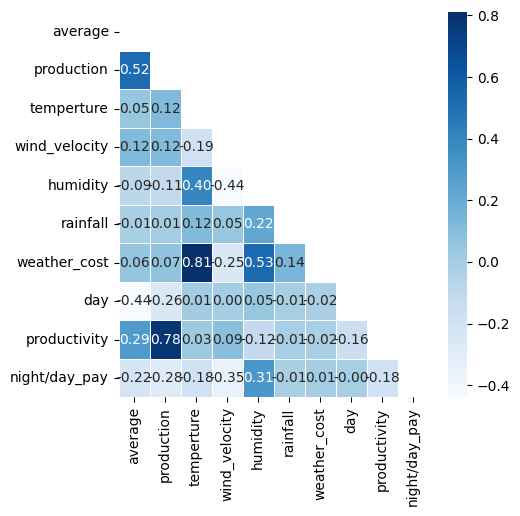

In [9]:
df2 = eng_df[['average','production','temperture','wind_velocity','humidity','rainfall',
              'weather_cost','day','productivity','night/day_pay']]

mask = np.zeros_like(df2.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(5,5))
sns.heatmap(data = df2.corr(), annot=True, mask = mask,
            fmt = '.2f', linewidths=.5, cmap='Blues')

#### Check VIF & Select columns

In [10]:
df2 = df2.dropna()

vif = pd.DataFrame()

vif["features"] = df2.columns 
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,features,VIF Factor
0,weather_cost,75.257650
1,night/day_pay,29.323222
2,humidity,18.836174
3,temperture,12.680335
4,average,5.754033
5,day,5.552948
6,production,4.661073
7,wind_velocity,4.539464
8,productivity,3.342707
9,rainfall,1.139751


In [11]:
def vif(x):
    df = x.copy()
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = df.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(df.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = df.drop(df.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [12]:
vif_df = vif(df2)
vif_df

1번째 VIF 측정
Max VIF feature & value : weather_cost, 75.25764997150466
2번째 VIF 측정
Max VIF feature & value : productivity, 17.715923675598916
3번째 VIF 측정
Max VIF feature & value : humidity, 8.805773099870141


average의 vif는 5.04입니다.
production의 vif는 4.53입니다.
temperture의 vif는 4.95입니다.
wind_velocity의 vif는 3.72입니다.
humidity의 vif는 8.81입니다.
rainfall의 vif는 1.11입니다.
day의 vif는 4.91입니다.
productivity의 vif는 3.29입니다.


,average,production,temperture,wind_velocity,humidity,rainfall,day,productivity
0,61,0,-3.2,2.4,71,0.0,5,0.000000
1,105,0,-4.5,1.5,77,0.0,5,0.000000
2,104,0,-3.9,2.6,58,0.0,5,0.000000
3,105,0,-4.1,2.6,56,0.0,5,0.000000
4,107,0,-4.6,2.6,60,0.0,5,0.000000
...,...,...,...,...,...,...,...,...
6163,153,1497,21.7,3.6,85,9.4,2,2.442088
6164,128,45,22.2,4.2,78,9.4,2,0.087891
6165,128,149,22.2,4.3,76,9.4,2,0.290448
6166,111,66,22.0,2.5,79,9.4,2,0.148984


### Check correlation between 'production' & 'productivity'

In [13]:
col = vif_df.columns.tolist()
col.remove('productivity')
production = df2[col]
productivity = df2[['productivity']]

x_train, x_test, y_train, y_test = train_test_split(production, productivity, train_size=0.8, test_size=0.2)

# plt.scatter(x, y)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
# x_plot = np.linspace(xmin,xmax)
# plt.plot(x_plot, x_plot*lr.coef_ + lr.intercept_, color='blue')

# plt.show()

[[-0.00485364  0.00195714 -0.01099073 -0.00635046 -0.00081417 -0.00059038
  -0.00497741]]
[0.69537338]


In [14]:
# 선형회귀 성능평가 (RMSE)
y_pred = lr.predict(x_test)

r2 = lr.score(x_train, y_train)
# RMSE = mean_squared_error(y_train, y_test)**0.5

print(f'R-square: {r2}')
# print(f'RMSE: {RMSE}')

R-square: 0.6867683029662762


### Check Some Columns' Distribution 

#### Check 'production' column's distribution

count    6168.000000
mean      467.344682
std       857.571815
min         0.000000
25%         0.000000
50%        45.000000
75%       637.250000
max      9830.000000
Name: production, dtype: float64


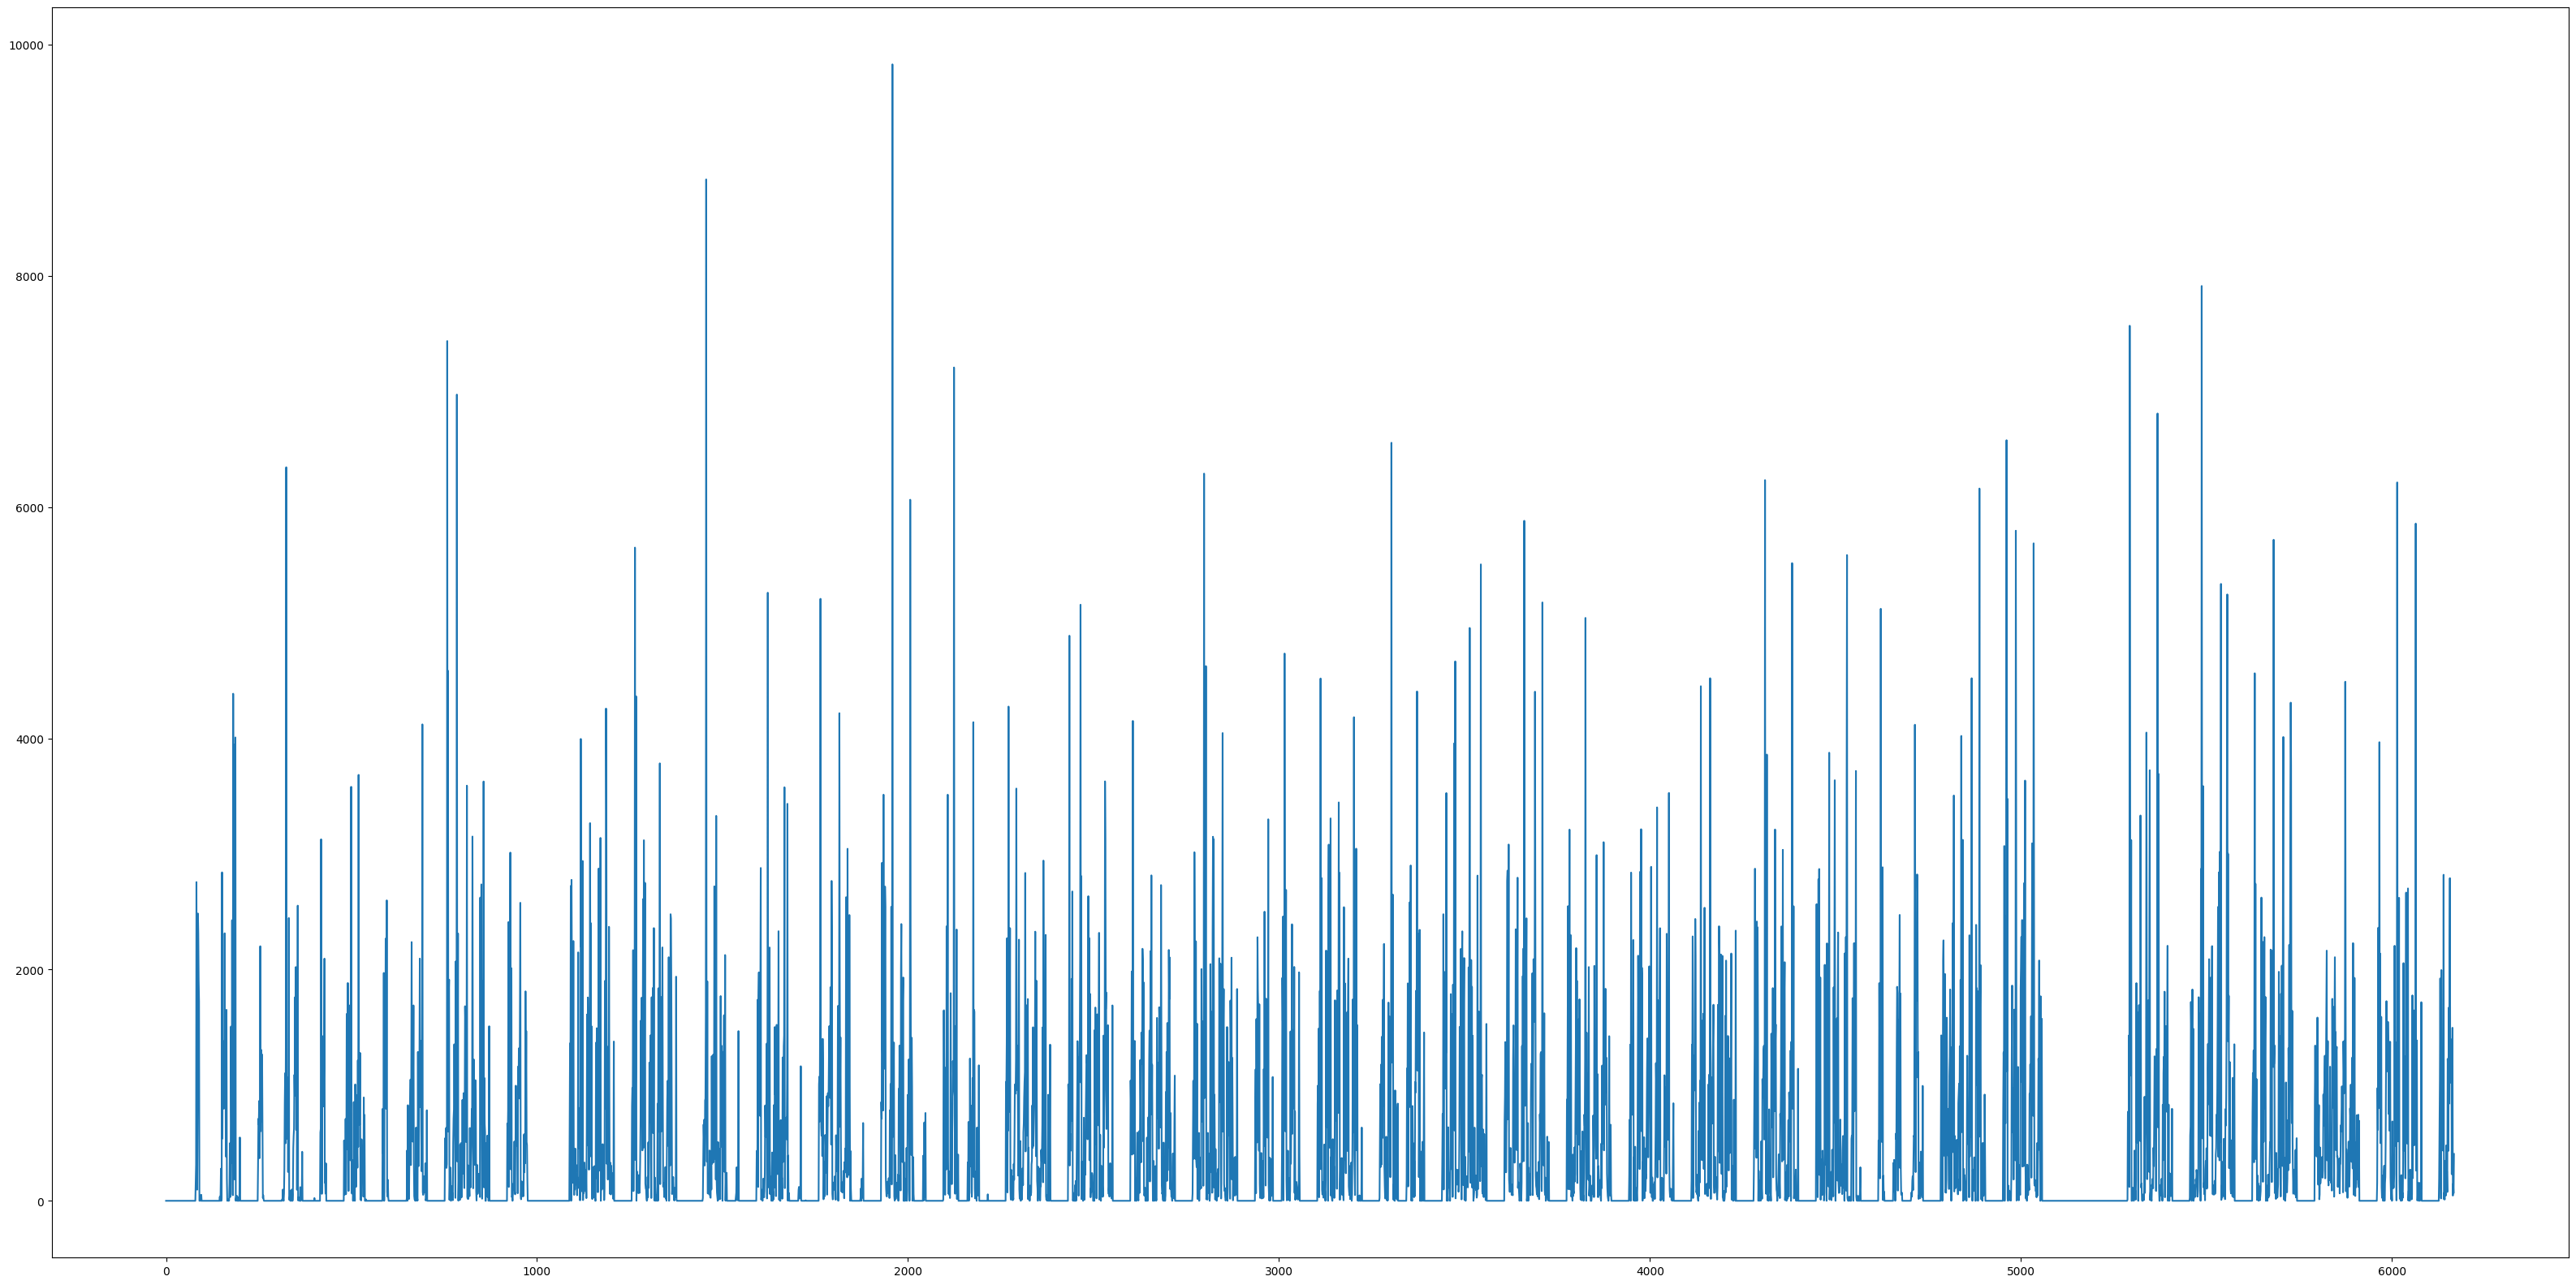

In [15]:
print(eng_df['production'].describe())

plt.figure(figsize=(40,20))

plt.plot(np.arange(0,len(eng_df)),eng_df['production'].values)
plt.show()

#### Check 'average' column's distribution when 'production' is zero, 'day' is Sat or Sun

[array([22., 19.]), array([24., 26.])]


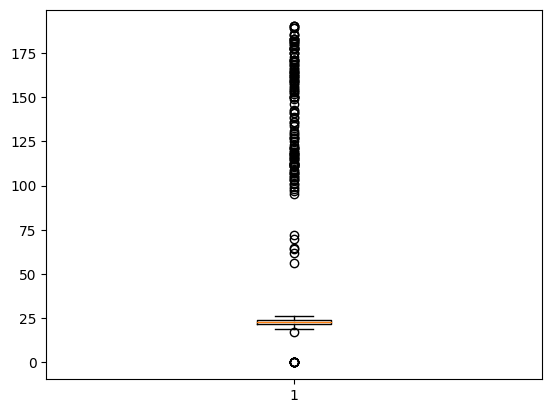

In [16]:
# 토, 일요일은 대부분 기계 유휴라는 가정하에 토일요일 생산량 0인 경우 전력량 box plot
product = (eng_df[(eng_df['production']==0) & (eng_df['day']==(6 | 7))])['production']
elec = (eng_df[(eng_df['production']==0) & (eng_df['day']==(6 | 7))])['average']

fig, ax = plt.subplots()

box= ax.boxplot(elec)

whiskers = [item.get_ydata() for item in box['whiskers']]
print(whiskers)

plt.show()

# 평균 전력량이 26보다 클 때, 이상치로 판단 > 공장 전체가 휴동 중엔 26 이하의 평균 전력량을 보일 것

# Preprocessing

### Clean Garbage Data ('time' column)

In [17]:
for raw in range(0,len(eng_df),24):
    for num in range(24):
        eng_df.loc[raw+num,'time'] = num
eng_df[4650:4700]

,date,time,0to15,15to30,30to45,45to60,average,production,temperture,wind_velocity,humidity,rainfall,weather_cost,day,d,m,productivity,night/day_pay
4650,20210713,18,152,143,160,153,152,0,28.2,0.6,84,0.0,191.6,2,13,7,0.000000,1.5
4651,20210713,19,170,168,187,172,174,0,27.5,0.7,87,0.0,191.6,2,13,7,0.000000,1.5
4652,20210713,20,168,189,169,174,175,0,27.0,0.2,90,0.0,191.6,2,13,7,0.000000,1.5
4653,20210713,21,165,178,179,173,174,0,27.3,1.5,87,0.0,191.6,2,13,7,0.000000,1.5
4654,20210713,22,187,171,177,176,178,0,26.8,2.4,88,0.0,191.6,2,13,7,0.000000,1.5
4655,20210713,23,190,188,187,188,188,0,26.3,1.6,90,0.0,191.6,2,13,7,0.000000,1.5
4656,20210714,0,75,71,73,72,73,327,26.3,2.0,88,0.0,191.6,3,14,7,1.123711,1.5
4657,20210714,1,90,112,107,99,102,166,26.1,1.9,87,0.0,191.6,3,14,7,0.406863,1.5
4658,20210714,2,109,108,107,97,105,354,25.7,1.3,88,0.0,191.6,3,14,7,0.840855,1.5
4659,20210714,3,86,100,114,109,102,111,25.6,2.1,88,0.0,191.6,3,14,7,0.271394,1.5


### Fill NaN

#### rainfall, wind_velocity: linear interpolation (because they are continuity)

In [18]:
eng_df[['rainfall','wind_velocity']] = eng_df[['rainfall','wind_velocity']].interpolate(method='values')

In [19]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6168 non-null   int64  
 1   time           6168 non-null   int64  
 2   0to15          6168 non-null   int64  
 3   15to30         6168 non-null   int64  
 4   30to45         6168 non-null   int64  
 5   45to60         6168 non-null   int64  
 6   average        6168 non-null   int64  
 7   production     6168 non-null   int64  
 8   temperture     6168 non-null   float64
 9   wind_velocity  6168 non-null   float64
 10  humidity       6168 non-null   int64  
 11  rainfall       6168 non-null   float64
 12  weather_cost   6168 non-null   float64
 13  day            6168 non-null   int64  
 14  d              6168 non-null   int64  
 15  m              6168 non-null   int64  
 16  productivity   6151 non-null   float64
 17  night/day_pay  6168 non-null   float64
dtypes: float

#### productivity: prediction of linear regression with 'production' column in same raw.
#### but, 'production' is zero, fill zero in 'productivity'

In [20]:
idx = (eng_df[eng_df['productivity'].isnull()].index)
for i in idx:
    if eng_df.loc[i,'production']==0:
        eng_df.loc[i,'productivity'] = 0
    else:
        eng_df.loc[i,'productivity'] = lr.predict(np.array([eng_df.loc[i,'production']]).reshape(-1,1))

In [21]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           6168 non-null   int64  
 1   time           6168 non-null   int64  
 2   0to15          6168 non-null   int64  
 3   15to30         6168 non-null   int64  
 4   30to45         6168 non-null   int64  
 5   45to60         6168 non-null   int64  
 6   average        6168 non-null   int64  
 7   production     6168 non-null   int64  
 8   temperture     6168 non-null   float64
 9   wind_velocity  6168 non-null   float64
 10  humidity       6168 non-null   int64  
 11  rainfall       6168 non-null   float64
 12  weather_cost   6168 non-null   float64
 13  day            6168 non-null   int64  
 14  d              6168 non-null   int64  
 15  m              6168 non-null   int64  
 16  productivity   6168 non-null   float64
 17  night/day_pay  6168 non-null   float64
dtypes: float

### Make 'datetime' column

In [22]:
eng_df= eng_df.astype({'date':'str','time':'str'})
eng_df['time'] = eng_df['time'].apply(lambda x:('0'+x) if len(x)==1 else x)
eng_df

,date,time,0to15,15to30,30to45,45to60,average,production,temperture,wind_velocity,humidity,rainfall,weather_cost,day,d,m,productivity,night/day_pay
0,20210101,00,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
1,20210101,01,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2,20210101,02,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
3,20210101,03,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
4,20210101,04,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,20210914,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
6164,20210914,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
6165,20210914,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5
6166,20210914,22,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,14,9,0.148984,1.5


In [23]:
df2 = eng_df.copy()
df2.insert(0,'datetime',0)
for raw in range(len(eng_df)):
    df2.loc[raw,'datetime'] = dt.datetime.strptime(f"{(eng_df.loc[raw,'date'])[:4]}-{(eng_df.loc[raw,'date'])[4:6]}-{(eng_df.loc[raw,'date'])[6:]} {eng_df.loc[raw,'time']}:00",
                                                   "%Y-%m-%d %H:%M")
eng_df = df2.drop(['date','time','d','m'], axis=1)
eng_df

,datetime,0to15,15to30,30to45,45to60,average,production,temperture,wind_velocity,humidity,rainfall,weather_cost,day,productivity,night/day_pay
0,2021-01-01 00:00:00,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,0.000000,1.5
1,2021-01-01 01:00:00,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,0.000000,1.5
2,2021-01-01 02:00:00,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,0.000000,1.5
3,2021-01-01 03:00:00,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,0.000000,1.5
4,2021-01-01 04:00:00,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,2021-09-14 19:00:00,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,2.442088,1.5
6164,2021-09-14 20:00:00,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,0.087891,1.5
6165,2021-09-14 21:00:00,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,0.290448,1.5
6166,2021-09-14 22:00:00,100,109,120,114,111,66,22.0,2.5,79,9.4,167.2,2,0.148984,1.5
